In [1]:
import librosa
import os
import numpy as np
spath1=os.listdir('F:\Datacopy\dataset')
#print(spath1)

In [2]:
def pad_array(input_array):
    '''
    Pads an array with one zero row and one zero column (added to the ends of the array)
    '''
    size = mfcc.size
    shape = mfcc.shape
    new_shape = (mfcc.shape[0], 431)
    new_size = (new_shape[0])*(new_shape[1])

    zero_array = np.zeros(new_size).reshape(new_shape)
    zero_array[:mfcc.shape[0], :mfcc.shape[1]] = mfcc

    return zero_array

In [3]:
os.getcwd()

'C:\\Users\\admin'

In [4]:
os.chdir('F:\Datacopy\dataset')

In [5]:
data, sampling_rate = librosa.load('f0001_us_f0001_00002.wav')
mfcc=librosa.feature.mfcc(y=data, sr=16000, S=None, n_mfcc=13, dct_type=2, norm='ortho')
mfcc1=pad_array(mfcc)
print(mfcc1)
print(mfcc1.shape)

[[-692.79240358 -685.78363047 -677.94375946 ...    0.
     0.            0.        ]
 [  53.28638988   55.06914672   56.24260806 ...    0.
     0.            0.        ]
 [   8.66105547    8.36930272    7.05599619 ...    0.
     0.            0.        ]
 ...
 [  10.79353822    9.49471389    3.86810303 ...    0.
     0.            0.        ]
 [   5.81641799    6.92123138    3.70011562 ...    0.
     0.            0.        ]
 [  11.10908205    8.85535782    2.76571497 ...    0.
     0.            0.        ]]
(13, 431)


In [6]:
data1=mfcc1
spath1=spath1[1:]
for file in spath1:
    data, sampling_rate = librosa.load(file)
    mfcc=librosa.feature.mfcc(y=data, sr=16000, S=None, n_mfcc=13, dct_type=2, norm='ortho')
    mfcc1=pad_array(mfcc)
    #print(mfcc1)
    #print(mfcc1.shape)
    data1=np.dstack((data1,mfcc1))
print(data1)
print(data1.shape)

[[[-6.92792404e+02 -6.92792404e+02 -6.97309804e+02 ... -6.38646344e+02
   -5.58711056e+02 -6.24399224e+02]
  [-6.85783630e+02 -6.85783630e+02 -6.88502515e+02 ... -6.32644061e+02
   -5.45376586e+02 -6.09206428e+02]
  [-6.77943759e+02 -6.77943759e+02 -6.87005495e+02 ... -6.35134903e+02
   -5.34689563e+02 -6.22639231e+02]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 5.32863899e+01  5.32863899e+01  5.52996664e+01 ...  4.52526437e+01
    4.71966629e+01  2.39245723e+01]
  [ 5.50691467e+01  5.50691467e+01  6.21544877e+01 ...  4.86379046e+01
    5.30052478e+01  2.17252473e+01]
  [ 5.62426081e+01  5.62426081e+01  6.12775017e+01 ...  4.65151293e+01
    5.79490817e+01  3.21020141e+01]
  ...
  [ 0.00000000e+00  0.0

In [18]:
np.save('mfccdata',data1)

In [19]:
data2=np.transpose(data1,(2,0,1))
print(data2)
print(data2.shape)

[[[-6.92792404e+02 -6.85783630e+02 -6.77943759e+02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 5.32863899e+01  5.50691467e+01  5.62426081e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 8.66105547e+00  8.36930272e+00  7.05599619e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 1.07935382e+01  9.49471389e+00  3.86810303e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 5.81641799e+00  6.92123138e+00  3.70011562e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.11090820e+01  8.85535782e+00  2.76571497e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[-6.92792404e+02 -6.85783630e+02 -6.77943759e+02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 5.32863899e+01  5.50691467e+01  5.62426081e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 8.66105547e+00  8.36930272e+00  7.05599619e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 1.07935382e+01  9.4

In [35]:
import os
import numpy as np
from utils import *
import random

In [9]:
os.chdir('E:\Speech\phones')
data = open('E:\Speech\phones\\trans.txt', 'r').read()
data= data.lower()
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print('There are %d total characters and %d unique characters in your data.' % (data_size, vocab_size))
print(chars)

There are 163756 total characters and 34 unique characters in your data.
["'", '&', 'y', 'v', 'c', 'e', 'u', 'n', '-', 'g', ',', 't', 'b', ' ', 'k', 's', 'o', 'x', 'h', 'd', 'm', 'f', 'l', '!', 'i', 'a', 'j', 'w', 'p', 'r', 'z', '\n', '.', 'q']


In [10]:
char_to_ix = { ch:i for i,ch in enumerate(sorted(chars)) }
ix_to_char = { i:ch for i,ch in enumerate(sorted(chars)) }
print(ix_to_char)
print(char_to_ix)

{0: '\n', 1: ' ', 2: '!', 3: '&', 4: "'", 5: ',', 6: '-', 7: '.', 8: 'a', 9: 'b', 10: 'c', 11: 'd', 12: 'e', 13: 'f', 14: 'g', 15: 'h', 16: 'i', 17: 'j', 18: 'k', 19: 'l', 20: 'm', 21: 'n', 22: 'o', 23: 'p', 24: 'q', 25: 'r', 26: 's', 27: 't', 28: 'u', 29: 'v', 30: 'w', 31: 'x', 32: 'y', 33: 'z'}
{'\n': 0, ' ': 1, '!': 2, '&': 3, "'": 4, ',': 5, '-': 6, '.': 7, 'a': 8, 'b': 9, 'c': 10, 'd': 11, 'e': 12, 'f': 13, 'g': 14, 'h': 15, 'i': 16, 'j': 17, 'k': 18, 'l': 19, 'm': 20, 'n': 21, 'o': 22, 'p': 23, 'q': 24, 'r': 25, 's': 26, 't': 27, 'u': 28, 'v': 29, 'w': 30, 'x': 31, 'y': 32, 'z': 33}


In [11]:
file = open('trans.txt', 'r').readlines()
print(len(file))
length = [len(x) for x in file]
print(max(length))

3842
79


In [12]:
file = open("trans.txt").readlines()
examples = [x.lower() for x in file]
f = np.zeros((3842, 79, 34))
l = np.zeros((3842, 79, 34))
print(examples[0])
for i in range(3842):
    for j,ch in enumerate(examples[i]):
        f[i, j , char_to_ix[ch]] = 1
        if j > 0:
            l[i, j-1, char_to_ix[ch]] = 1
            
print(len(examples))
print(f[1, 1, :])
print(l[1, 0,:])

the world needs opportunities for new leaders and new ideas.

3842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

In [15]:
def audio_model(input_shape):
    encoder = Input(shape = (None, 431))
    X, state_h, state_c = LSTM(128, return_state = True)(encoder)
    
    encoder_states = [state_h, state_c]
    

    # Set up the decoder, using `encoder_states` as initial state.
    decoder_inputs = Input(shape=(None, 34))
    
    # We set up our decoder to return full output sequences,
    # and to return internal states as well. We don't use the 
    # return states in the training model, but we will use them in inference.
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                         initial_state=encoder_states)
    X = Dense(34, activation='softmax')(decoder_outputs)
    
    model = Model(inputs = [encoder, decoder_inputs], outputs = X)
    
    return model

In [16]:
model = audio_model((3842, 13,431))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 431)    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 34)     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 128), (None, 286720      input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, None, 128),  83456       input_2[0][0]                    
                                     

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model1=model.fit([data2, f],
          l,validation_split=0.3,shuffle=True,
          batch_size=400,
          epochs=40)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 2689 samples, validate on 1153 samples
Epoch 1/40
2689/2689 [==============================] - 27s 10ms/step - loss: 1.8268 - acc: 0.0591 - val_loss: 1.8045 - val_acc: 0.0865
Epoch 2/40
2689/2689 [==============================] - 11s 4ms/step - loss: 1.6842 - acc: 0.0867 - val_loss: 1.6346 - val_acc: 0.0871
Epoch 3/40
2689/2689 [==============================] - 11s 4ms/step - loss: 1.5809 - acc: 0.0874 - val_loss: 1.5922 - val_acc: 0.0870
Epoch 4/40
2689/2689 [==============================] - 10s 4ms/step - loss: 1.5552 - acc: 0.0869 - val_loss: 1.5740 - val_acc: 0.0871
Epoch 5/40
2689/2689 [==============================] - 10s 4ms/step - loss: 1.5419 - acc: 0.0869 - val_loss: 1.5655 - val_acc: 0.0872
Epoch 6/40
2689/2689 [==============================] - 10s 4ms/step - loss: 1.5340 - acc: 0.0881 - val_loss: 1.5594 - val_acc: 0.0877
Epoch 7/40
2689

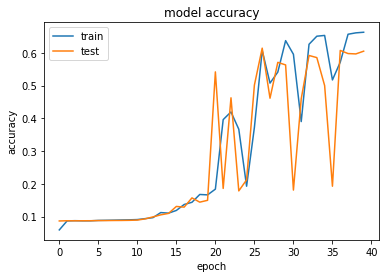

In [23]:
import matplotlib.pyplot as plt
plt.plot(model1.history['acc'])
plt.plot(model1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

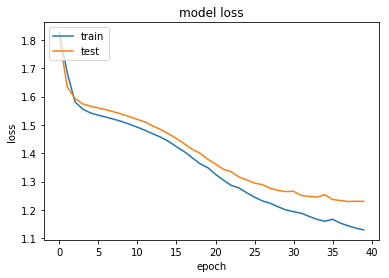

In [22]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model1=model.fit([data2, f],
          l,validation_split=0.4,shuffle=True,
          batch_size=400,
          epochs=40)

Train on 2305 samples, validate on 1537 samples
Epoch 1/40
2305/2305 [==============================] - 12s 5ms/step - loss: 1.1602 - acc: 0.4132 - val_loss: 1.2242 - val_acc: 0.6179
Epoch 2/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.1407 - acc: 0.6290 - val_loss: 1.2091 - val_acc: 0.2346
Epoch 3/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.1266 - acc: 0.2307 - val_loss: 1.2030 - val_acc: 0.1963
Epoch 4/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.1181 - acc: 0.4255 - val_loss: 1.2024 - val_acc: 0.6024
Epoch 5/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.1092 - acc: 0.6667 - val_loss: 1.2019 - val_acc: 0.6156
Epoch 6/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.1028 - acc: 0.6721 - val_loss: 1.2037 - val_acc: 0.6021
Epoch 7/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.0996 - acc: 0.6728 - val_loss: 1.2035 - val_acc: 0.5919
Epoch 8

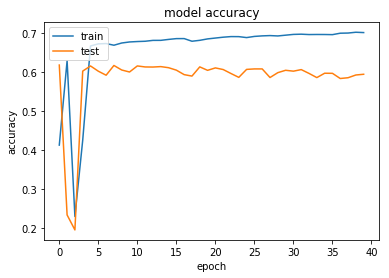

In [25]:
import matplotlib.pyplot as plt
plt.plot(model1.history['acc'])
plt.plot(model1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

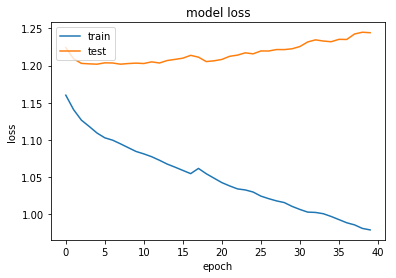

In [26]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()